# Analysis of the final dataset. Connection to MYSQL through Python.

Because of the connection to the local database, it is recommended to run this file locally. 

The tools needed to run this project are:

* Xampp
* MySQL
* Qgis

_The used data for this project can be found in the following links:_ 

* https://www.inegi.org.mx/app/ageeml/  AGEEML
* https://www.inegi.org.mx/temas/mg/#Descargas Shapefiles from all Mexico
* https://www.inegi.org.mx/temas/climatologia/#Descargas Clime shapefiles from all Mexico
* https://www.inegi.org.mx/sistemas/scitel/default?ev=7 education rate from the INEGI census 2020 
* https://www.inegi.org.mx/app/descarga/default.html Directorio Estadístico Nacional de Unidades Económicas (DENUE) economic units rate from the INEGI census 2020
* https://www.gob.mx/salud/documentos/datos-abiertos-152127 COVID-19 historic bases from the Mexican government page Datos Abiertos Dirección General de Epidemiología (DGE)
* https://coronavirus.hidalgo.gob.mx/ The COVID-19 hospitals’ distribution was obtained from the official Hidalgo state government page

In [34]:
#Libraries for the MySQL connection
import csv
import pymysql
import pandas as pd
import unicodedata
from sqlalchemy import create_engine, types

#libraries for plotting
import mysql.connector 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [35]:
#Testing connection
mydb = mysql.connector.connect( 
  host = "localhost", 
  user = "root", 
  password = "", 
  database = "prueba",
)  
  
mycursor = mydb.cursor() 

### INSERTING DATA TO THE DATABASE

* *UBICACIÓN*

In [24]:
#Creating the engine that will allow uploading the data into the MySQL local database

engine = create_engine('mysql://root:@localhost/prueba?charset=utf8')
df = pd.read_csv("ubicacion.csv",sep=',',quotechar='\'',encoding='utf8') 
df.to_sql('ubicación',con=engine,index=False,if_exists='append')

* *COVID*

In [36]:
engine = create_engine('mysql://root:@localhost/prueba?charset=utf8')
df = pd.read_csv("Entidades.csv",sep=',', header=0, encoding='utf-8')
df.to_sql('DatosCovid',con=engine,index=False,if_exists='append')

* _AGEEML_

In [46]:
engine = create_engine('mysql://root:@localhost/prueba?charset=utf8')
df = pd.read_csv("Entidades.csv", sep=',', header=0, encoding='utf-8')
df.to_sql('AGEEML',con=engine,index=False,if_exists='append')

# QUERIES

In [37]:
#Query to count the total number of each case

casospositivos =  pd.read_sql("""
           SELECT MUNICIPIO_RES, NOM_MUN, LON_DECIMAL,LAT_DECIMAL,
            count(*) AS TOTAL_CASES,
            SUM(CASE WHEN SEXO = '1' THEN 1 ELSE 0 END) AS TOTAL_WOMEN,                                                                                                    
                     
            SUM(CASE WHEN SEXO = '2' THEN 1 ELSE 0 END) AS TOTAL_MEN,
            SUM(CASE WHEN CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS TOTAL_POSITIVE,
            SUM(CASE WHEN SEXO = 1 AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS WOMEN_POSITIVE,
            SUM(CASE WHEN SEXO = 2 AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS MEN_POSITIVE,
            SUM(CASE WHEN FECHA_DEF != '9999-99-99' THEN 1 ELSE 0 END) AS TOTAL_DEATHS,
            SUM(CASE WHEN SEXO = 1 AND FECHA_DEF != '9999-99-99' THEN 1 ELSE 0 END) AS WOMEN_DEATHS,
            SUM(CASE WHEN SEXO = 2 AND FECHA_DEF != '9999-99-99' THEN 1 ELSE 0 END) AS MEN_DEATHS,
            SUM(CASE WHEN UCI = '1' THEN 1 ELSE 0 END) AS TOTAL_UCI,
            SUM(CASE WHEN SEXO = 1 AND UCI = '1' THEN 1 ELSE 0 END) AS WOMEN_UCI,
            SUM(CASE WHEN SEXO = 2 AND UCI = '1' THEN 1 ELSE 0 END) AS MEN_UCI,
            SUM(CASE WHEN SEXO = '1' THEN 1 ELSE 0 END) AS TOTAL_WOMEN,
            
            SUM(CASE WHEN CLASIFICACION_FINAL = '3' AND DIABETES = '1' THEN 1 ELSE 0 END) AS TOTAL_DIAB,
            SUM(CASE WHEN SEXO = '1' AND DIABETES = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS WOMEN_DIAB,
            SUM(CASE WHEN SEXO = '2' AND DIABETES = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS MEN_DIAB,
            SUM(CASE WHEN CLASIFICACION_FINAL = '3' AND EPOC = '1' THEN 1 ELSE 0 END) AS TOTAL_EPOC,
            SUM(CASE WHEN SEXO = '1' AND EPOC = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS WOMEN_EPOC,
            SUM(CASE WHEN SEXO = '2' AND EPOC = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS MEN_EPOC,
            SUM(CASE WHEN CLASIFICACION_FINAL = '3' AND ASMA = '1' THEN 1 ELSE 0 END) AS TOTAL_ASMA,
            SUM(CASE WHEN SEXO = '1' AND ASMA = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS WOMEN_ASMA,
            SUM(CASE WHEN SEXO = '2' AND ASMA = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS MEN_ASMA,
            SUM(CASE WHEN CLASIFICACION_FINAL = '3' AND INMUSUPR  = '1' THEN 1 ELSE 0 END) AS TOTAL_INMUSUPR,
            SUM(CASE WHEN SEXO = '1' AND INMUSUPR = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS WOMEN_INMUSUPR,
            SUM(CASE WHEN SEXO = '2' AND INMUSUPR = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS MEN_INMUSUPR,
            SUM(CASE WHEN CLASIFICACION_FINAL = '3' AND HIPERTENSION = '1' THEN 1 ELSE 0 END) AS TOTAL_HIPERTENSION,
            SUM(CASE WHEN SEXO = '1' AND HIPERTENSION = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS WOMEN_HIPERTENSION,
            SUM(CASE WHEN SEXO = '2' AND HIPERTENSION = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS MEN_HIPERTENSION,
            SUM(CASE WHEN CLASIFICACION_FINAL = '3' AND OTRA_COM = '1' THEN 1 ELSE 0 END) AS TOTAL_OTRA,
            SUM(CASE WHEN SEXO = '1' AND OTRA_COM  = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS WOMEN_OTRA,
            SUM(CASE WHEN SEXO = '2' AND OTRA_COM  = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS MEN_OTRA,
            SUM(CASE WHEN CLASIFICACION_FINAL = '3' AND CARDIOVASCULAR = '1' THEN 1 ELSE 0 END) AS TOTAL_CARDIOVASCULAR,
            SUM(CASE WHEN SEXO = '1' AND CARDIOVASCULAR  = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS WOMEN_CARDIOVASCULAR,
            SUM(CASE WHEN SEXO = '2' AND CARDIOVASCULAR  = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS MEN_CARDIOVASCULAR,
            SUM(CASE WHEN CLASIFICACION_FINAL = '3' AND RENAL_CRONICA  = '1' THEN 1 ELSE 0 END) AS TOTAL_RENAL,
            SUM(CASE WHEN SEXO = '1' AND RENAL_CRONICA  = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS WOMEN_RENAL,
            SUM(CASE WHEN SEXO = '2' AND RENAL_CRONICA  = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS MEN_RENAL,
            SUM(CASE WHEN CLASIFICACION_FINAL = '3' AND TABAQUISMO = '1' THEN 1 ELSE 0 END) AS TOTAL_TABAQUISMO,
            SUM(CASE WHEN SEXO = '1' AND TABAQUISMO  = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS WOMEN_TABAQUISMO,
            SUM(CASE WHEN SEXO = '2' AND TABAQUISMO  = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS MEN_TABAQUISMO,
            SUM(CASE WHEN CLASIFICACION_FINAL = '3' AND OTRO_CASO = '1' THEN 1 ELSE 0 END) AS TOTAL_OTRO,
            SUM(CASE WHEN SEXO = '1' AND OTRO_CASO = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS WOMEN_OTRO,
            SUM(CASE WHEN SEXO = '2' AND OTRO_CASO = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS MEN_OTRO,
            SUM(CASE WHEN CLASIFICACION_FINAL = '3' AND NEUMONIA = '1' THEN 1 ELSE 0 END) AS TOTAL_NEUMONIA,
            SUM(CASE WHEN SEXO = '1' AND NEUMONIA = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS WOMEN_NEUMONIA,
            SUM(CASE WHEN SEXO = '2' AND NEUMONIA = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS MEN_NEUMONIA,
            SUM(CASE WHEN CLASIFICACION_FINAL = '3' AND OBESIDAD = '1' THEN 1 ELSE 0 END) AS TOTAL_OBESIDAD,
            SUM(CASE WHEN SEXO = '1' AND OBESIDAD = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS WOMEN_OBESIDAD,
            SUM(CASE WHEN SEXO = '2' AND OBESIDAD = '1' AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS MEN_OBESIDAD
           FROM datoscovid GROUP BY NOM_MUN LIMIT 42, 41;
            """, con = mydb)


# Return the first five rows
casospositivos.head()

,MUNICIPIO_RES,NOM_MUN,LON_DECIMAL,LAT_DECIMAL,TOTAL_CASES,TOTAL_WOMEN,TOTAL_MEN,TOTAL_POSITIVE,WOMEN_POSITIVE,MEN_POSITIVE,TOTAL_DEATHS,WOMEN_DEATHS,MEN_DEATHS,TOTAL_UCI,WOMEN_UCI,MEN_UCI,TOTAL_WOMEN,TOTAL_DIAB,WOMEN_DIAB,MEN_DIAB,TOTAL_EPOC,WOMEN_EPOC,MEN_EPOC,TOTAL_ASMA,WOMEN_ASMA,MEN_ASMA,TOTAL_INMUSUPR,WOMEN_INMUSUPR,MEN_INMUSUPR,TOTAL_HIPERTENSION,WOMEN_HIPERTENSION,MEN_HIPERTENSION,TOTAL_OTRA,WOMEN_OTRA,MEN_OTRA,TOTAL_CARDIOVASCULAR,WOMEN_CARDIOVASCULAR,MEN_CARDIOVASCULAR,TOTAL_RENAL,WOMEN_RENAL,MEN_RENAL,TOTAL_TABAQUISMO,WOMEN_TABAQUISMO,MEN_TABAQUISMO,TOTAL_OTRO,WOMEN_OTRO,MEN_OTRO,TOTAL_NEUMONIA,WOMEN_NEUMONIA,MEN_NEUMONIA,TOTAL_OBESIDAD,WOMEN_OBESIDAD,MEN_OBESIDAD
0,43,NicolÃ¡s Flores,-99.150556,20.767778,78,30.0,48.0,42.0,22.0,20.0,4.0,0.0,4.0,0.0,0.0,0.0,30.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,22.0,10.0,12.0,6.0,4.0,2.0,10.0,4.0,6.0
1,44,Nopala de VillagrÃ¡n,-99.644238,20.251890,438,226.0,212.0,254.0,124.0,130.0,30.0,12.0,18.0,14.0,10.0,4.0,226.0,38.0,14.0,24.0,6.0,2.0,4.0,2.0,0.0,2.0,2.0,2.0,0.0,62.0,32.0,30.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,130.0,72.0,58.0,64.0,30.0,34.0,60.0,36.0,24.0
2,45,OmitlÃ¡n de JuÃ¡rez,-98.648639,20.169500,266,152.0,114.0,162.0,98.0,64.0,38.0,22.0,16.0,16.0,12.0,4.0,152.0,42.0,26.0,16.0,10.0,6.0,4.0,4.0,4.0,0.0,4.0,2.0,2.0,34.0,22.0,12.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,8.0,4.0,4.0,76.0,50.0,26.0,58.0,36.0,22.0,26.0,18.0,8.0
3,48,Pachuca de Soto,-98.737001,20.122360,35632,18330.0,17302.0,17338.0,8368.0,8970.0,2814.0,1002.0,1812.0,570.0,182.0,388.0,18330.0,2642.0,1224.0,1418.0,288.0,154.0,134.0,272.0,170.0,102.0,144.0,98.0,46.0,3562.0,1676.0,1886.0,536.0,292.0,244.0,352.0,158.0,194.0,400.0,178.0,222.0,1732.0,550.0,1182.0,7062.0,3594.0,3468.0,3854.0,1442.0,2412.0,2892.0,1358.0,1534.0
4,47,Pacula,-99.296099,21.050821,84,44.0,40.0,48.0,24.0,24.0,8.0,6.0,2.0,2.0,2.0,0.0,44.0,12.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,12.0,4.0,8.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,32.0,20.0,12.0,14.0,8.0,6.0,4.0,0.0,4.0


In [6]:
#Export the file to build the choropleth map
casospositivos.to_csv('C:/Users/almej/Desktop/Hidalgo.csv')

In [71]:
#Query to create the graphs for total population, households, total cases, total positive cases, 
TotalBar =  pd.read_sql("""
           SELECT NOM_MUN,
            count(*) AS TOTAL_CASES, POB_MASCULINA, POB_FEMENINA, VIV_HABITADAS, POB_TOTAL,
            SUM(CASE WHEN CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS TOTAL_POSITIVE,
            SUM(CASE WHEN FECHA_DEF != '9999-99-99' THEN 1 ELSE 0 END) AS TOTAL_DEATHS,
            SUM(CASE WHEN UCI = '1' THEN 1 ELSE 0 END) AS TOTAL_UCI
           FROM datoscovid GROUP BY NOM_MUN LIMIT 42, 41 ;
            """, con = mydb)

# Return the first five rows
TotalBar.head()

,NOM_MUN,TOTAL_CASES,POB_MASCULINA,POB_FEMENINA,VIV_HABITADAS,POB_TOTAL,TOTAL_POSITIVE,TOTAL_DEATHS,TOTAL_UCI
0,AcatlÃ¡n,398,192,213,107,405,144.0,35.0,13.0
1,AcaxochitlÃ¡n,463,1939,2087,946,4026,187.0,65.0,18.0
2,Actopan,1222,13720,15503,7314,29223,642.0,193.0,33.0
3,Agua Blanca de Iturbide,175,932,1075,498,2007,65.0,12.0,3.0
4,Ajacuba,466,3546,3699,1831,7245,266.0,75.0,46.0


# BAR GRAPHS

* Bar graph for total population and households

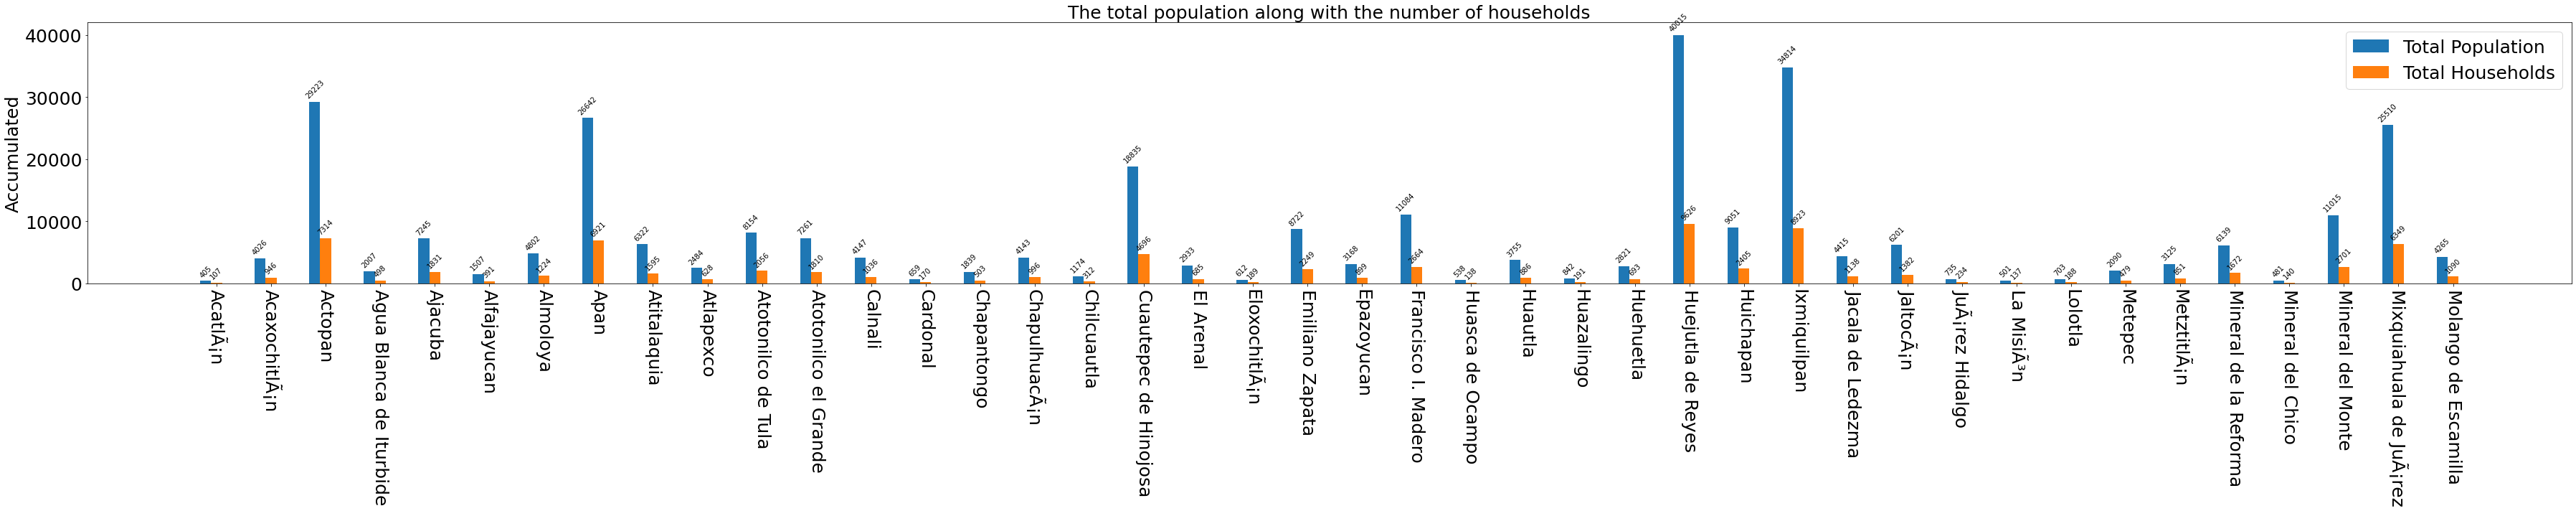

In [72]:
#Creating the 

x = np.arange(len(TotalBar['NOM_MUN']))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(1, figsize=(50,10))
rects1 = ax.bar(x - width ,TotalBar['POB_TOTAL'], width, label='Total Population')
rects2 = ax.bar(x, TotalBar['VIV_HABITADAS'], width, label='Total Households')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accumulated')
ax.set_title('Municipalities')
ax.set_xticks(x)
ax.set_xticklabels(TotalBar['NOM_MUN'],rotation=270)
ax.legend(fontsize=25)
ax. xaxis. label. set_size(25)
ax. yaxis. label. set_size(25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

ax.bar_label(rects1, padding=3, rotation=45)
ax.bar_label(rects2, padding=3, rotation=45)

#Title of the graph
plt.title("The total population along with the number of households",fontsize=25)


#Generating and saving the graph
plt.show()
fig.tight_layout()
fig.savefig('C:/Users/almej/Desktop/TotalPopulationPart1.png')

* Bar comparing the total cases, total positive cases, total deaths and total number of patients transferred to ICU

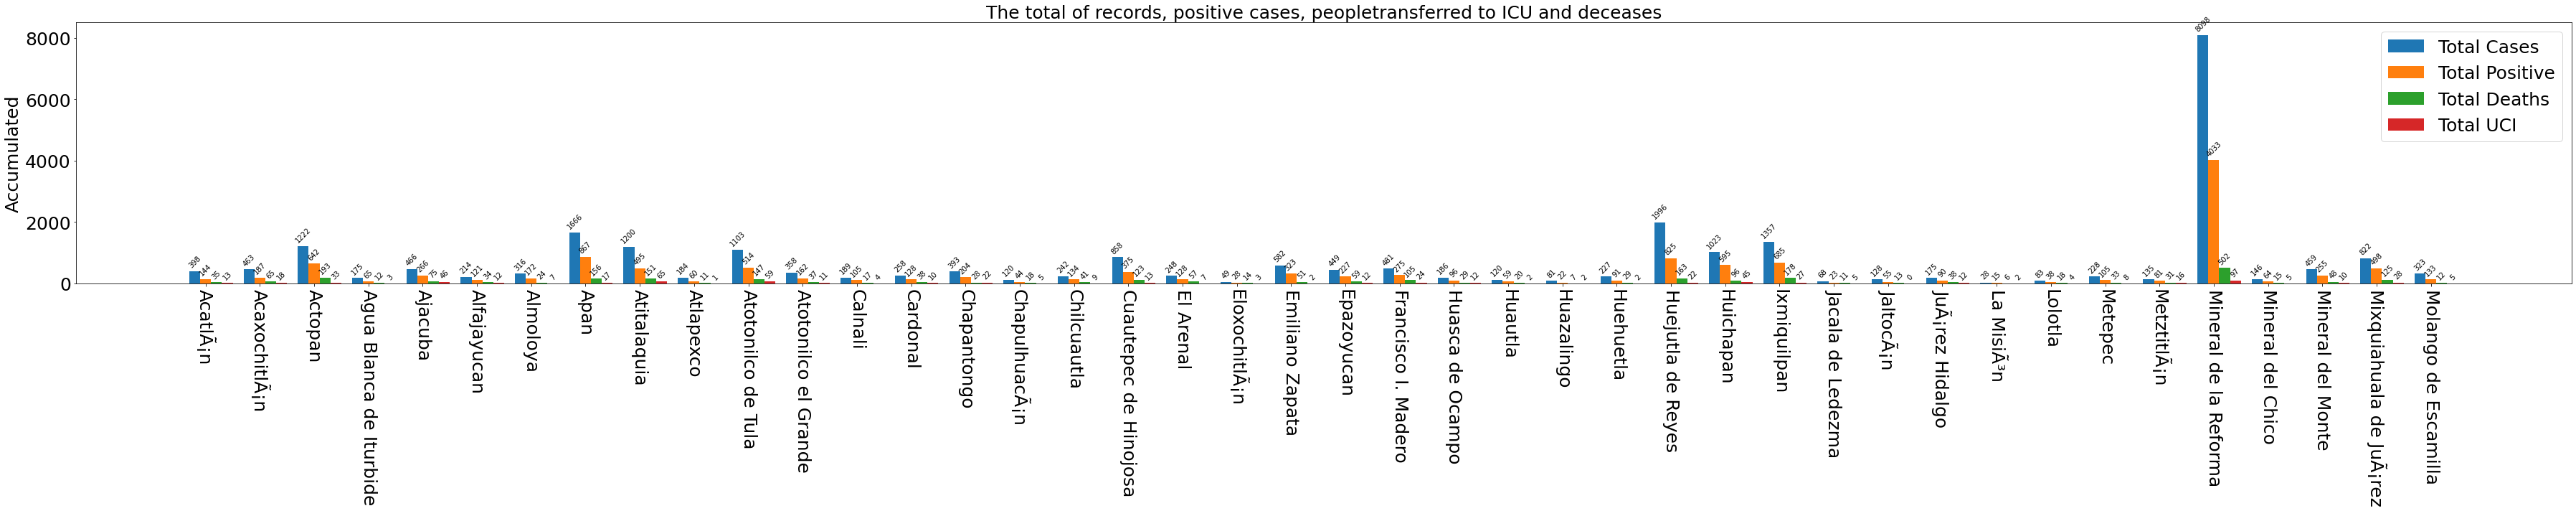

In [73]:
x = np.arange(len(TotalBar['NOM_MUN']))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(1, figsize=(50,10))
rects1 = ax.bar(x - width ,TotalBar['TOTAL_CASES'], width, label='Total Cases')
rects2 = ax.bar(x, TotalBar['TOTAL_POSITIVE'], width, label='Total Positive')
rects3 = ax.bar(x + width, TotalBar['TOTAL_DEATHS'], width, label='Total Deaths')
rects4 = ax.bar(x + width*2, TotalBar['TOTAL_UCI'], width, label='Total UCI')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accumulated')
ax.set_title('Municipalities')
ax.set_xticks(x)
ax.set_xticklabels(TotalBar['NOM_MUN'],rotation=270)
ax.legend(fontsize=25)
ax. xaxis. label. set_size(25)
ax. yaxis. label. set_size(25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

ax.bar_label(rects1, padding=3, rotation=45)
ax.bar_label(rects2, padding=3, rotation=45)
ax.bar_label(rects3, padding=3, rotation=45)
ax.bar_label(rects4, padding=3, rotation=45)

#Title
plt.title("The total of records, positive cases, peopletransferred to ICU and deceases",fontsize=25)

#Generating and saving the graph
plt.show()
fig.tight_layout()
fig.savefig('C:/Users/almej/Desktop/ComparisonTotalsPart1.png')

# PERCENTAGE GRAPHS

* Total percentage of female and male population

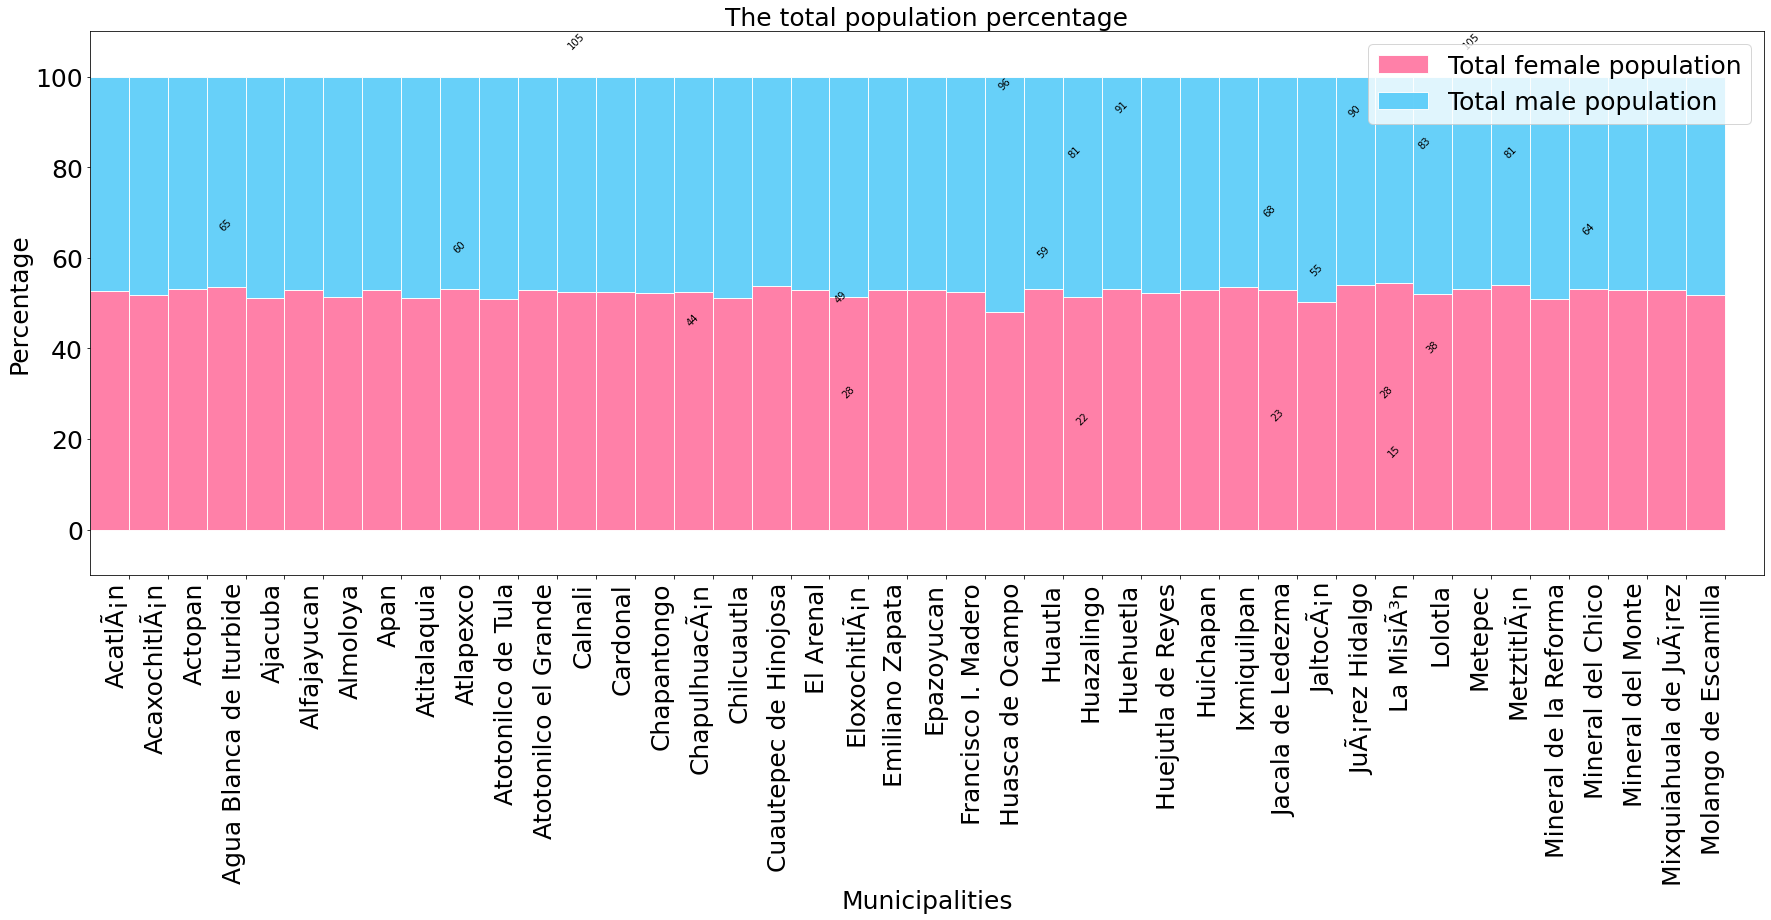

In [74]:
# Create a figure with a single subplot
fig, ax = plt.subplots(1, figsize=(30,10))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(TotalBar['POB_FEMENINA']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score
totals = [i+j for i,j in zip(TotalBar['POB_FEMENINA'],TotalBar['POB_MASCULINA'])]

# Create the percentage of the total positive cases in females
total_women = [i / j * 100 for  i,j in zip(TotalBar['POB_FEMENINA'], totals)]

# Create the percentage of the total positive cases in male
total_men = [i / j * 100 for  i,j in zip(TotalBar['POB_MASCULINA'], totals)]



ax.bar(bar_l, 
       # using pre_rel data
       total_women, 
       # labeled 
       label='Total female population', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF729F',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       total_men, 
       # with
       bottom=total_women,
       # labeled 
       label='Total male population', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#56CBF9',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )


plt.legend(labels = ['Total female population','Total male population'],fontsize=25)


ax.bar_label(rects1, padding=3, rotation=45)
ax.bar_label(rects2, padding=3, rotation=45)

plt.title("The total population percentage",fontsize=25)

# Set the ticks to be first names
plt.xticks(tick_pos, TotalBar['NOM_MUN'])
ax.set_ylabel("Percentage")
ax.set_xlabel("Municipalities")
ax. xaxis. label. set_size(25)
ax. yaxis. label. set_size(25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

#Rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')

#Show plot
plt.show()

#Generating and saving the graph
fig.tight_layout()
fig.savefig('C:/Users/almej/Desktop/TotalpopulationPercentagePart1.png')

* Total number of positive cases for females and males

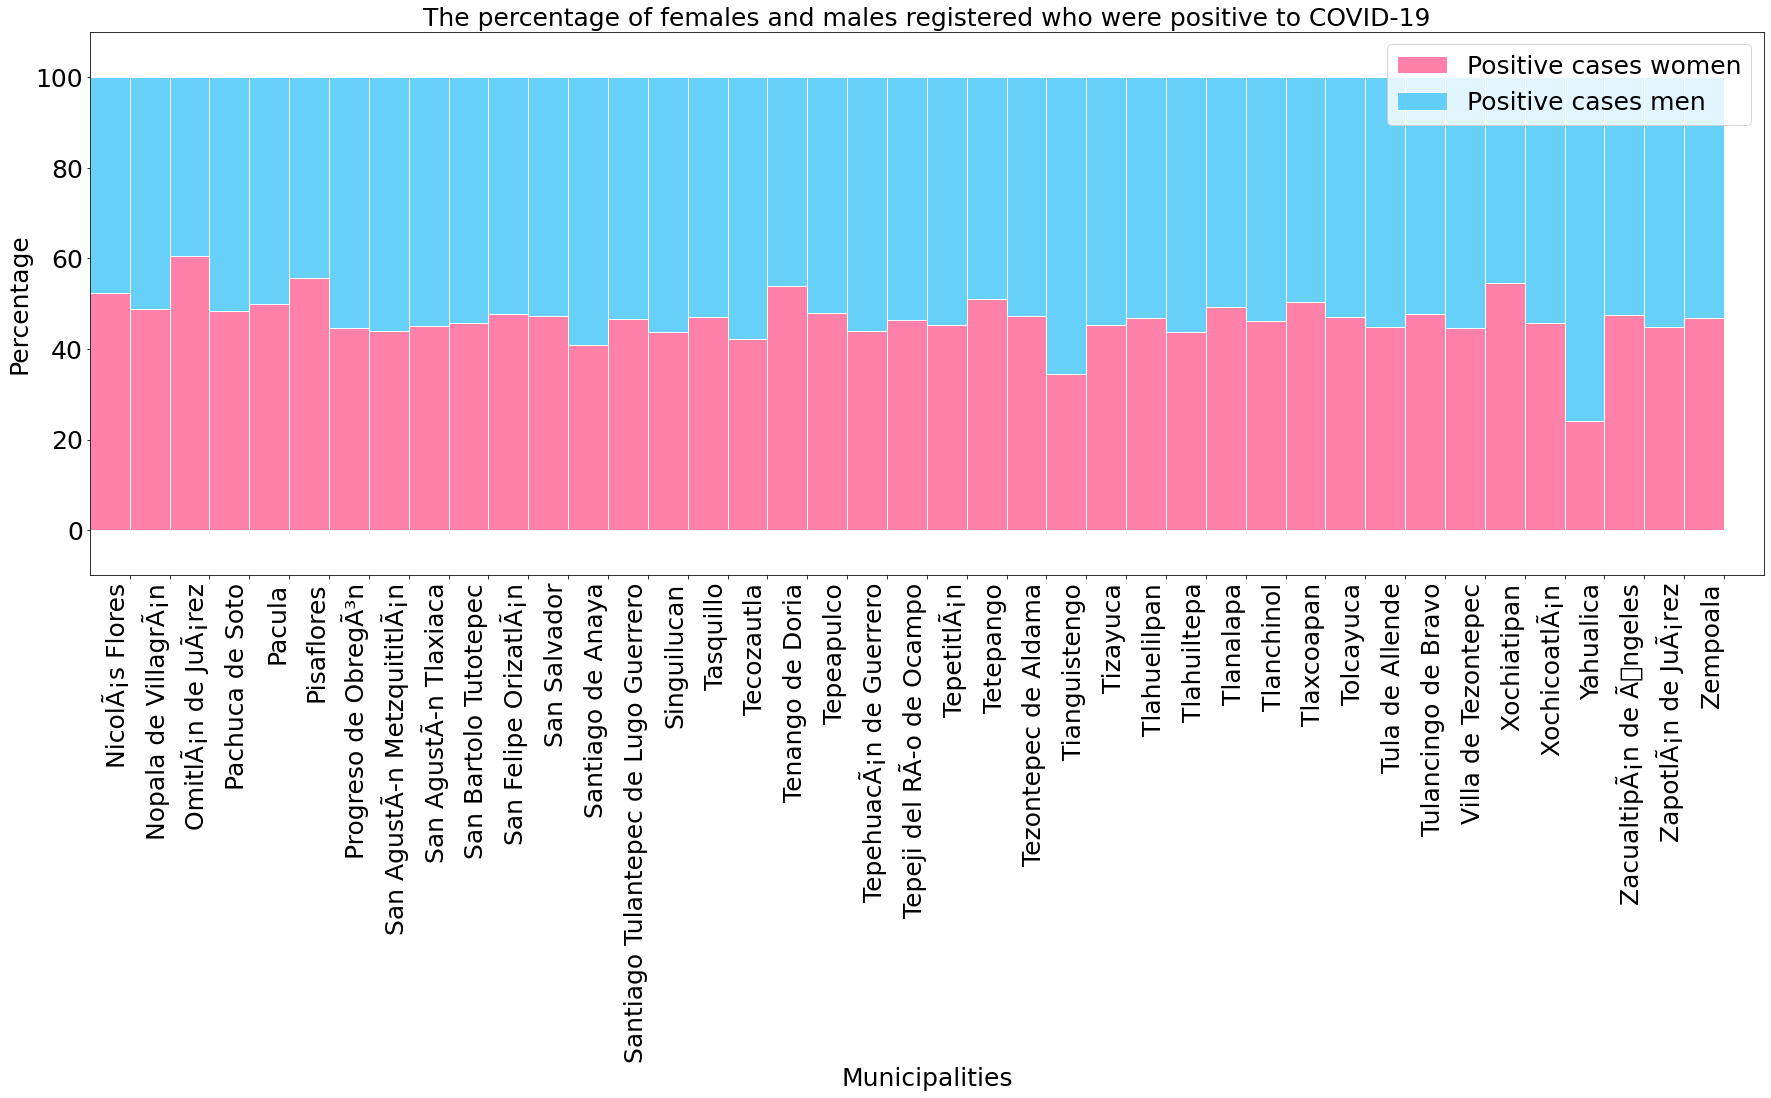

In [30]:
# Create a figure with a single subplot
fig, ax = plt.subplots(1, figsize=(30,10))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(casospositivos['WOMEN_POSITIVE']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score
totals = [i+j for i,j in zip(casospositivos['WOMEN_POSITIVE'],casospositivos['MEN_POSITIVE'])]

# Create the percentage of the total positive cases in females
total_women = [i / j * 100 for  i,j in zip(casospositivos['WOMEN_POSITIVE'], totals)]

# Create the percentage of the total positive cases in male
total_men = [i / j * 100 for  i,j in zip(casospositivos['MEN_POSITIVE'], totals)]



ax.bar(bar_l, 
       # using pre_rel data
       total_women, 
       # labeled 
       label='Positive female cases', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF729F',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       total_men, 
       # with
       bottom=total_women,
       # labeled 
       label='Positive male cases', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#56CBF9',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )


plt.title("The percentage of females and males registered who were positive to COVID-19",fontsize=25)
plt.legend(labels = ['Positive cases women','Positive cases men'],fontsize=25)

# Set the ticks to be first names
plt.xticks(tick_pos, casospositivos['NOM_MUN'])
ax.set_ylabel("Percentage")
ax.set_xlabel("Municipalities")
ax. xaxis. label. set_size(25)
ax. yaxis. label. set_size(25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')

# shot plot
plt.show()

fig.tight_layout()
fig.savefig('C:/Users/almej/Desktop/PositiveTotals.png')

* Total number of female and male suspect cases

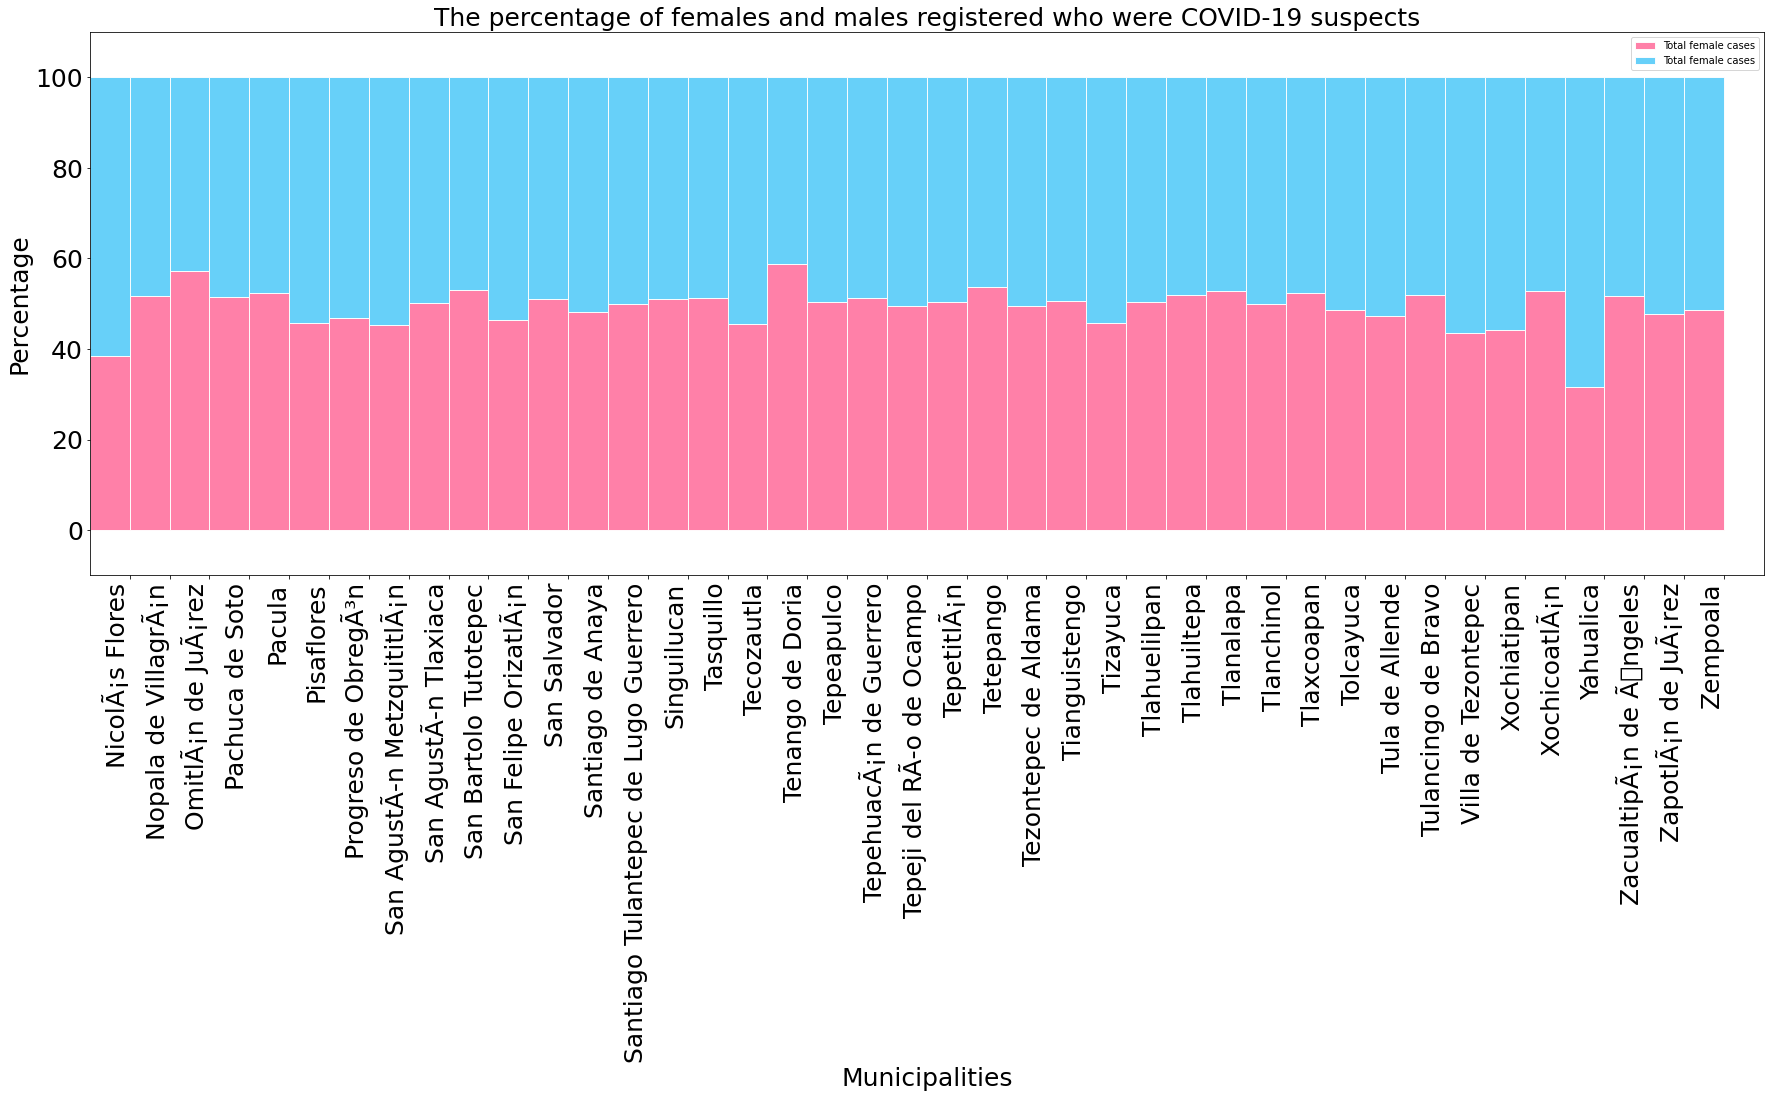

In [31]:
# Create a figure with a single subplot
fig, ax = plt.subplots(1, figsize=(30,10))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(casospositivos2['TOTAL_WOMEN']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score
totals = [i+j for i,j in zip(casospositivos2['TOTAL_WOMEN'],casospositivos2['TOTAL_MEN'])]

# Create the percentage of the total positive cases in females
total_women = [i / j * 100 for  i,j in zip(casospositivos2['TOTAL_WOMEN'], totals)]

# Create the percentage of the total positive cases in male
total_men = [i / j * 100 for  i,j in zip(casospositivos2['TOTAL_MEN'], totals)]



ax.bar(bar_l, 
       # using pre_rel data
       total_women, 
       # labeled 
       label='Total female cases', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF729F',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       total_men, 
       # with
       bottom=total_women,
       # labeled 
       label='Total male cases', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#56CBF9',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )


plt.title("The percentage of females and males registered who were COVID-19 suspects",fontsize=25)
plt.legend(labels = ['Total female cases','Total female cases'])

# Set the ticks to be first names
plt.xticks(tick_pos, casospositivos['NOM_MUN'])
ax.set_ylabel("Percentage")
ax.set_xlabel("Municipalities")
ax. xaxis. label. set_size(25)
ax. yaxis. label. set_size(25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)


# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

#Rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')

#Show plot
plt.show()

#Generating and saving the graph
fig.tight_layout()
fig.savefig('C:/Users/almej/Desktop/TotalsCOVID19.png')

* Total number of patients transferred to UCI

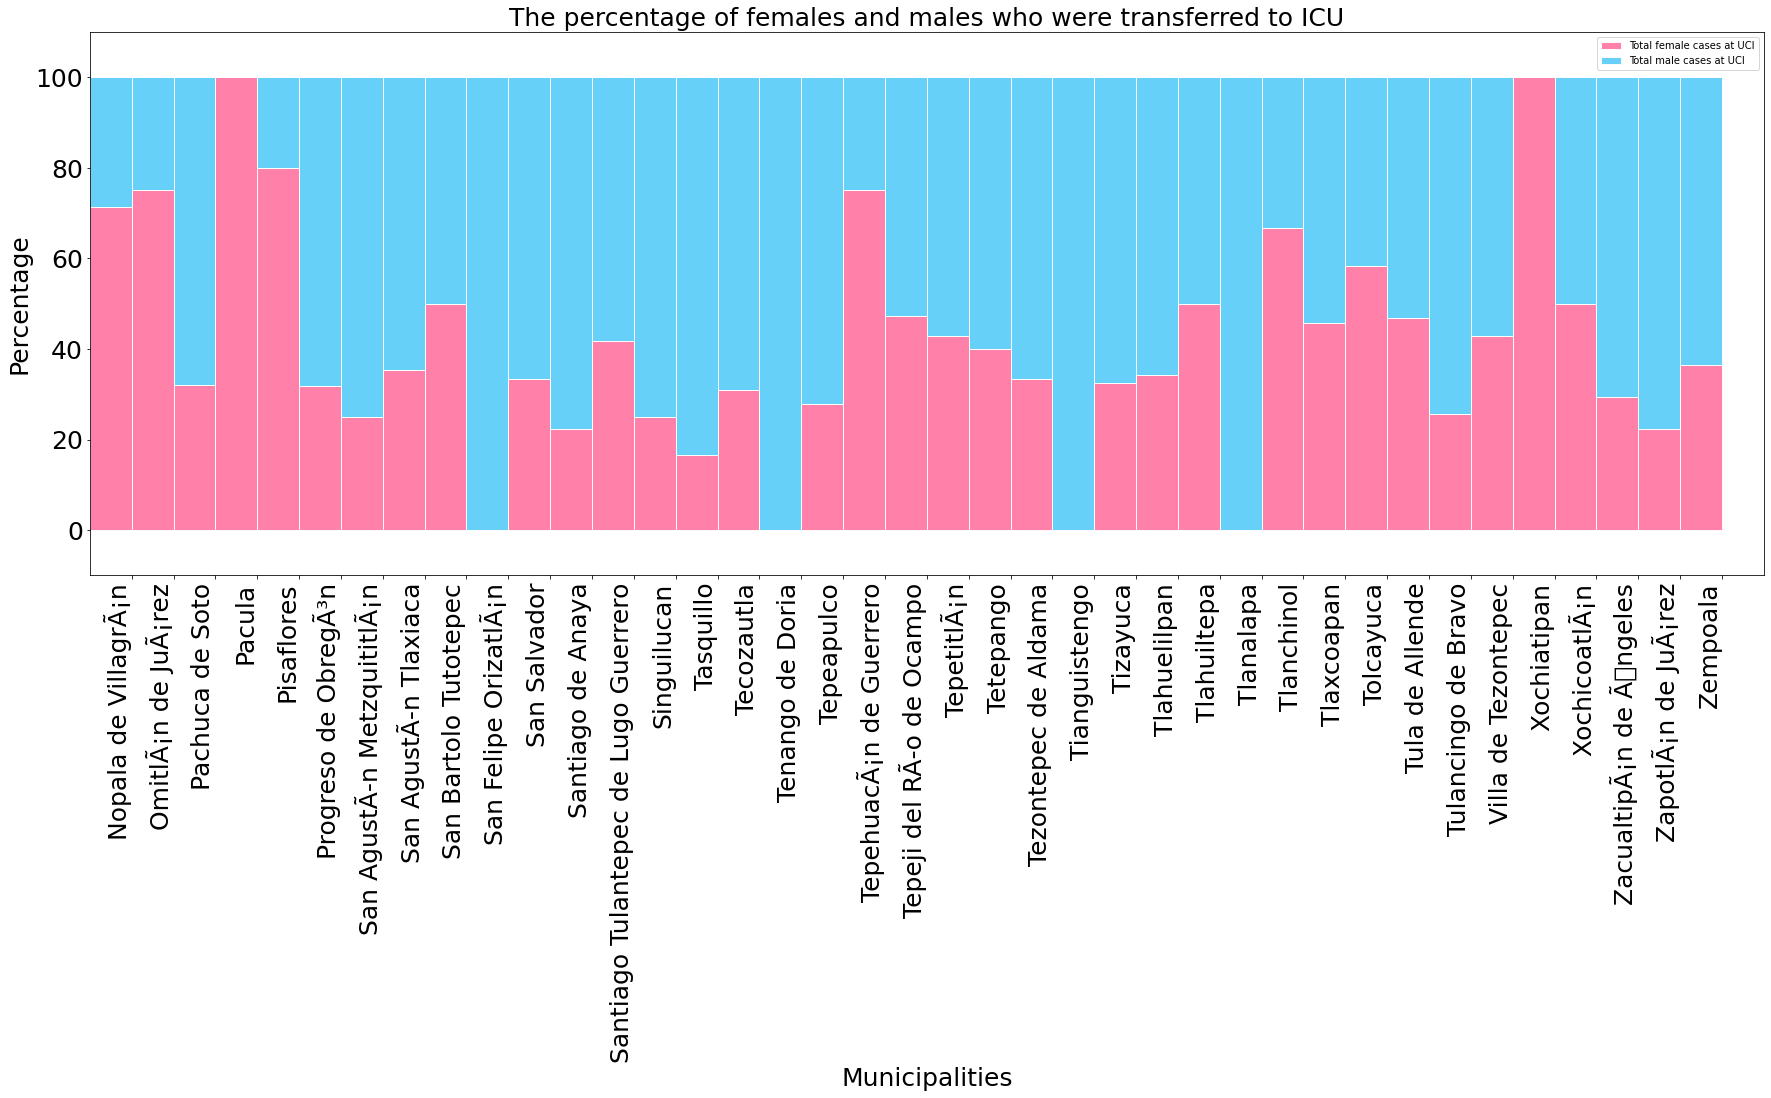

In [32]:
casospositivos = casospositivos.loc[(casospositivos['TOTAL_UCI'] != 0)]

# Create a figure with a single subplot
fig, ax = plt.subplots(1, figsize=(30,10))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(casospositivos['WOMEN_UCI']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score
totals = [i+j for i,j in zip(casospositivos['WOMEN_UCI'],casospositivos['MEN_UCI'])]

# Create the percentage of the total positive cases in females
total_women = [i / j * 100 for  i,j in zip(casospositivos['WOMEN_UCI'], totals)]

# Create the percentage of the total positive cases in male
total_men = [i / j * 100 for  i,j in zip(casospositivos['MEN_UCI'], totals)]



ax.bar(bar_l, 
       # using pre_rel data
       total_women, 
       # labeled 
       label='Total female cases at UCI', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF729F',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       total_men, 
       # with
       bottom=total_women,
       # labeled 
       label='Total male cases at UCI', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#56CBF9',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )


plt.title("The percentage of females and males who were transferred to ICU",fontsize=25)
plt.legend(labels = ['Total female cases at UCI','Total male cases at UCI'])

# Set the ticks to be first names
plt.xticks(tick_pos, casospositivos['NOM_MUN'])
ax.set_ylabel("Percentage")
ax.set_xlabel("Municipalities")
ax. xaxis. label. set_size(25)
ax. yaxis. label. set_size(25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)


# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')

# shot plot
plt.show()

fig.tight_layout()
fig.savefig('C:/Users/almej/Desktop/TotalsUCI.png')

* Total number of female and male deaths

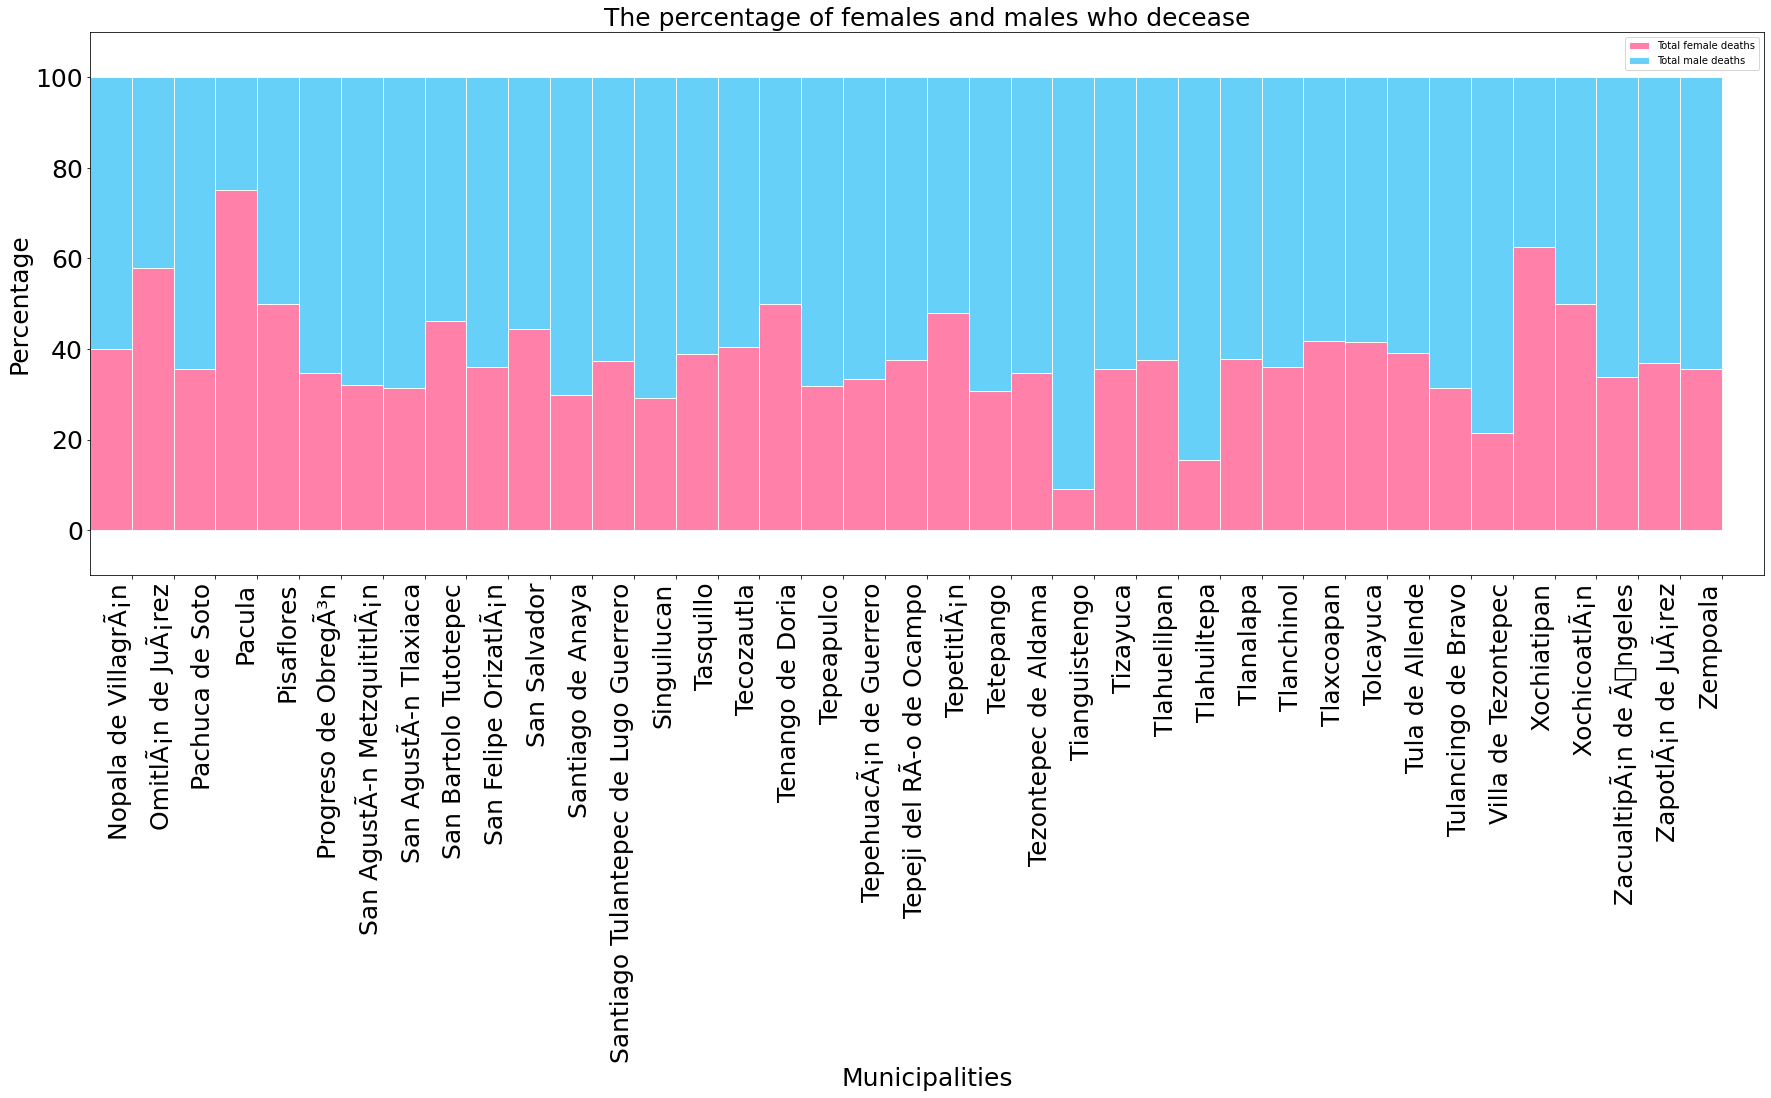

In [33]:
# Create a figure with a single subplot
fig, ax = plt.subplots(1, figsize=(30,10))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(casospositivos['WOMEN_DEATHS']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score
totals = [i+j for i,j in zip(casospositivos['WOMEN_DEATHS'],casospositivos['MEN_DEATHS'])]

# Create the percentage of the total positive cases in females
total_women = [i / j * 100 for  i,j in zip(casospositivos['WOMEN_DEATHS'], totals)]

# Create the percentage of the total positive cases in male
total_men = [i / j * 100 for  i,j in zip(casospositivos['MEN_DEATHS'], totals)]



ax.bar(bar_l, 
       # using pre_rel data
       total_women, 
       # labeled 
       label='Total female deaths', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF729F',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       total_men, 
       # with
       bottom=total_women,
       # labeled 
       label='Total male deaths', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#56CBF9',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )


plt.title("The percentage of females and males who decease",fontsize=25)
plt.legend(labels = ['Total female deaths','Total male deaths'])

# Set the ticks to be first names
plt.xticks(tick_pos, casospositivos['NOM_MUN'])
ax.set_ylabel("Percentage")
ax.set_xlabel("Municipalities")
ax. xaxis. label. set_size(25)
ax. yaxis. label. set_size(25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)


# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')

# shot plot
plt.show()

fig.tight_layout()
fig.savefig('C:/Users/almej/Desktop/TotalDeaths.png')

# POPULATION PYRAMIDS

* Population pyramid of Hidalgo state

In [38]:
#create dataframe
df = pd.DataFrame({'Age': ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+'], 
                    'Male': [120314,136027,143492,137426,116241,108338,102706,101835,97725,91193,79935,65244,55713,44117,31397,22656,13534,7713,2878,1115,192], 
                    'Female': [117875,133526,140184,135080,121946,122786,121520,119575,113323,103374,91744,74551,63216,48894,34782,24607,16463,9708,4335,1905,450]})

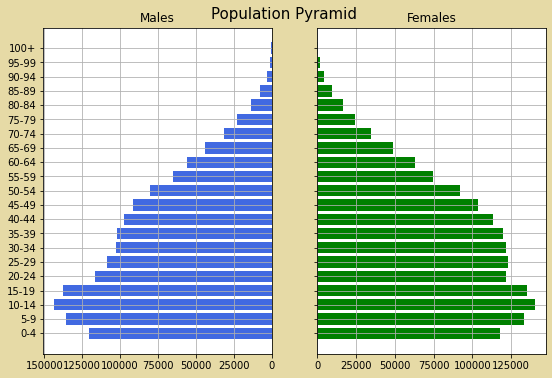

In [39]:
#define x and y limits
y = range(0, len(df))
x_male = df['Male']
x_female = df['Female']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:beige')
plt.figtext(.5,.9,"Population Pyramid ", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='green')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df['Age'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

* Query to gather the number of suspected cases per age group

In [5]:
TotalCases =  pd.read_sql("""
           SELECT  AGE_GROUP, 
            count(*) AS TotalCases, 
            SUM(CASE WHEN SEXO = 1 THEN 1 ELSE 0 END) AS Women,
            SUM(CASE WHEN SEXO = 2 THEN 1 ELSE 0 END) AS Men
           FROM datoscovid GROUP BY AGE_GROUP;
            """, con = mydb)

TotalCases.head()

,AGE_GROUP,TotalCases,Women,Men
0,None,1,0.0,1.0
1,0-10,1489,689.0,800.0
2,100+,8,5.0,3.0
3,11-20,3576,1876.0,1700.0
4,21-30,16078,8327.0,7751.0


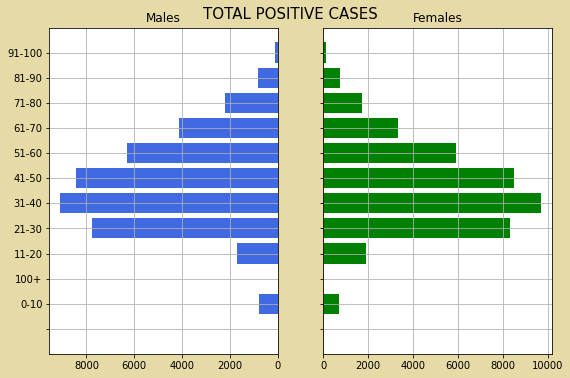

In [6]:
#define x and y limits
y = range(0, len(TotalCases))
x_male = TotalCases['Men']
x_female = TotalCases['Women']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:beige')
plt.figtext(.5,.9,"TOTAL POSITIVE CASES ", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='green')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=TotalCases['AGE_GROUP'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

* Query that gathers the total number of positive cases per age group

In [7]:
GrupoPositivo =  pd.read_sql("""
           SELECT  AGE_GROUP, 
            count(*) AS TotalCases, 
            SUM(CASE WHEN SEXO = 1 AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS Women,
            SUM(CASE WHEN SEXO = 2 AND CLASIFICACION_FINAL = '3' THEN 1 ELSE 0 END) AS Men
           FROM datoscovid GROUP BY AGE_GROUP;
            """, con = mydb)

GrupoPositivo.head()

,AGE_GROUP,TotalCases,Women,Men
0,None,1,0.0,0.0
1,0-10,1489,125.0,133.0
2,100+,8,0.0,2.0
3,11-20,3576,618.0,526.0
4,21-30,16078,3049.0,2941.0


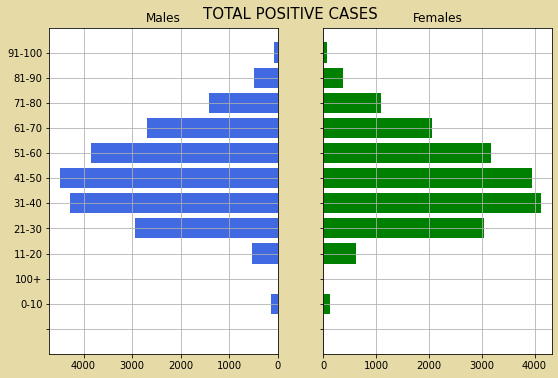

In [8]:
#define x and y limits
y = range(0, len(GrupoPositivo))
x_male = GrupoPositivo['Men']
x_female = GrupoPositivo['Women']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:beige')
plt.figtext(.5,.9,"TOTAL POSITIVE CASES ", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='green')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=GrupoPositivo['AGE_GROUP'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

* Query that gathers the number of patients transferred to ICU per age group

In [10]:
uci =  pd.read_sql("""
           SELECT  AGE_GROUP, 
            count(*) AS TotalCases, 
            SUM(CASE WHEN SEXO = 1 AND UCI = '1' THEN 1 ELSE 0 END) AS Women,
            SUM(CASE WHEN SEXO = 2 AND UCI = '1' THEN 1 ELSE 0 END) AS Men
           FROM datoscovid GROUP BY AGE_GROUP;
            """, con = mydb)

uci.head()

,AGE_GROUP,TotalCases,Women,Men
0,None,1,0.0,0.0
1,0-10,1489,43.0,40.0
2,100+,8,0.0,1.0
3,11-20,3576,15.0,12.0
4,21-30,16078,49.0,46.0


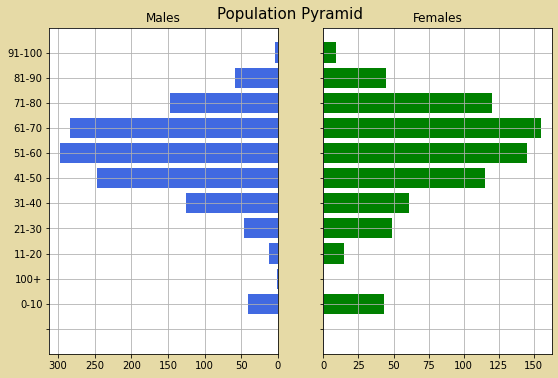

In [13]:
#define x and y limits
y = range(0, len(uci))
x_male = uci['Men']
x_female = uci['Women']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:beige')
plt.figtext(.5,.9,"Population Pyramid ", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='green')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=uci['AGE_GROUP'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

* Query that gathers the number of deceased per age group

In [104]:
defunciones =  pd.read_sql("""
           SELECT  AGE_GROUP, 
            count(*) AS TotalCases, 
            SUM(CASE WHEN SEXO = 1 AND FECHA_DEF != '9999-99-99' THEN 1 ELSE 0 END) AS Women,
            SUM(CASE WHEN SEXO = 2 AND FECHA_DEF != '9999-99-99' THEN 1 ELSE 0 END) AS Men
           FROM datoscovid GROUP BY AGE_GROUP;
            """, con = mydb)

queryframe4.head()

,AGE_GROUP,TotalCases,Women,Men
0,[0- 10),344,2.0,6.0
1,[10- 20),478,1.0,3.0
2,[20- 29),1582,8.0,18.0
3,[29- 39),2724,18.0,43.0
4,[39- 49),2789,57.0,133.0


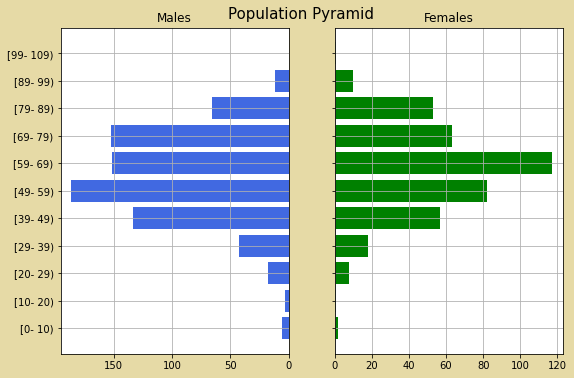

In [105]:
#define x and y limits
y = range(0, len(defunciones))
x_male = defunciones['Men']
x_female = defunciones['Women']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:beige')
plt.figtext(.5,.9,"Population Pyramid ", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='green')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=queryframe4['AGE_GROUP'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

# SPATIO-TEMPORAL ANALYSIS

* Query to gather the number of cases per month in the year 2020

In [3]:
CasosFecha =  pd.read_sql("""
           SELECT FECHA_INGRESO,
            SUM(CASE WHEN CLASIFICACION_FINAL = 3 THEN 1 ELSE 0 END) AS TotalCases,
            SUM(CASE WHEN SEXO = 1 AND CLASIFICACION_FINAL = 3 THEN 1 ELSE 0 END) AS Women,
            SUM(CASE WHEN SEXO = 2 AND CLASIFICACION_FINAL = 3 THEN 1 ELSE 0 END) AS Men
           FROM datoscovid WHERE  FECHA_INGRESO LIKE '%2020%' GROUP BY FECHA_INGRESO DESC; 
            """, con = mydb)

# Return the first five rows
CasosFecha.head(20)

,FECHA_INGRESO,TotalCases,Women,Men
0,12/2020,5541.0,2664.0,2877.0
1,11/2020,3615.0,1742.0,1873.0
2,10/2020,2808.0,1327.0,1481.0
3,09/2020,2394.0,1090.0,1304.0
4,08/2020,3557.0,1725.0,1832.0
5,07/2020,3187.0,1466.0,1721.0
6,06/2020,2254.0,999.0,1255.0
7,05/2020,1782.0,768.0,1014.0
8,04/2020,357.0,139.0,218.0
9,03/2020,40.0,15.0,25.0


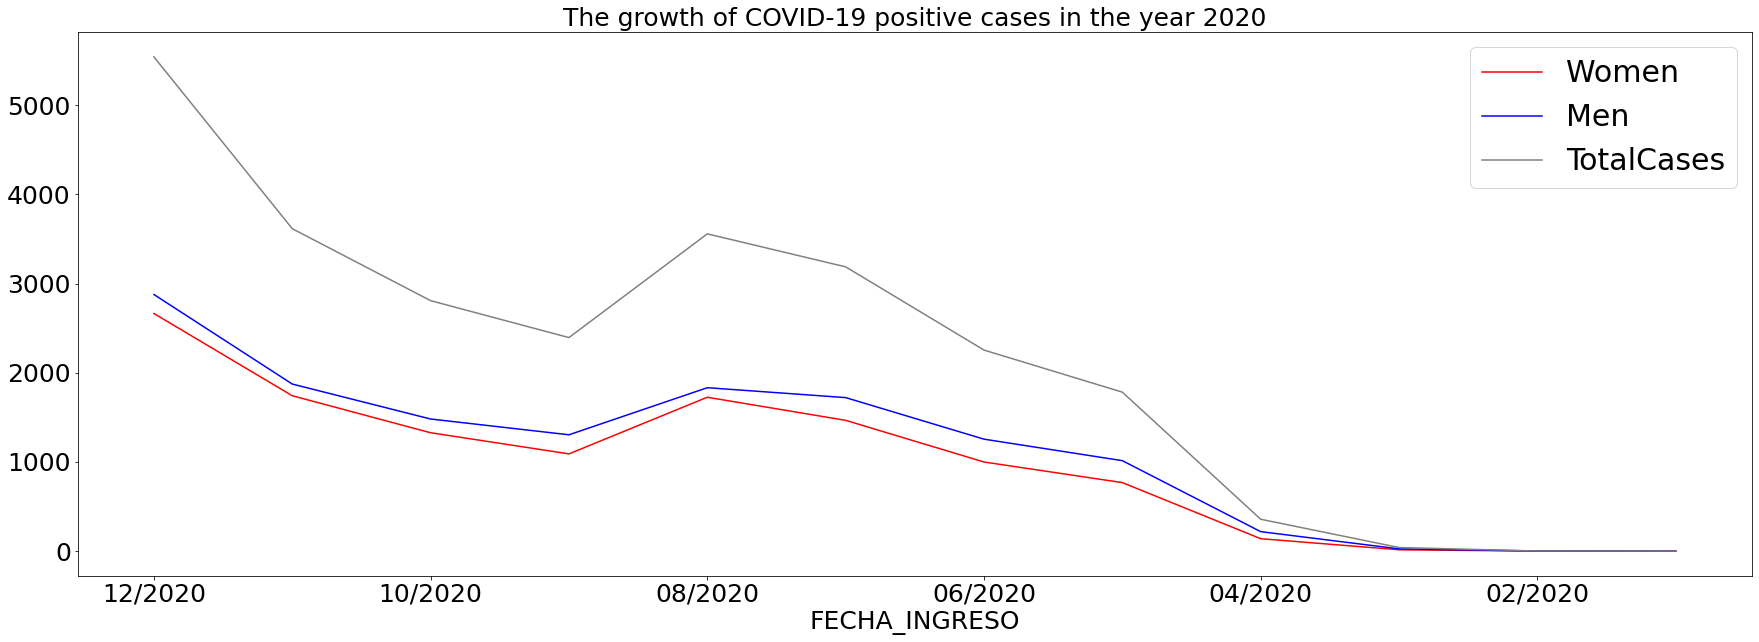

In [23]:
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(30,10))

ax = plt.gca()

#Defining labels
CasosFecha.plot(kind='line',x='FECHA_INGRESO',y='Women', color= 'red',ax=ax)
CasosFecha.plot(kind='line',x='FECHA_INGRESO',y='Men', color= 'blue',ax=ax)
CasosFecha.plot(kind='line',x='FECHA_INGRESO',y='TotalCases', color='grey', ax=ax)

#Adding title
plt.title("The growth of COVID-19 positive cases in the year 2020",fontsize=25)

#Modifying font size
ax.legend(fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax. xaxis. label. set_size(25)
ax. yaxis. label. set_size(25)

plt.show()

# Saving figure
f.savefig('C:/Users/almej/Desktop/Growth2020.png')

* Query to gather the number of cases in year 2021

In [24]:
CasosFecha2021 =  pd.read_sql("""
           SELECT FECHA_INGRESO,
            SUM(CASE WHEN CLASIFICACION_FINAL = 3 THEN 1 ELSE 0 END) AS TotalCases,
            SUM(CASE WHEN SEXO = 1 AND CLASIFICACION_FINAL = 3 THEN 1 ELSE 0 END) AS Women,
            SUM(CASE WHEN SEXO = 2 AND CLASIFICACION_FINAL = 3 THEN 1 ELSE 0 END) AS Men
           FROM datoscovid WHERE  FECHA_INGRESO LIKE '%2021%' GROUP BY FECHA_INGRESO DESC; 
            """, con = mydb)

# Return the first five rows
CasosFecha2021.head(20)

,FECHA_INGRESO,TotalCases,Women,Men
0,05/2021,392.0,189.0,203.0
1,04/2021,1527.0,734.0,793.0
2,03/2021,2033.0,966.0,1067.0
3,02/2021,2669.0,1259.0,1410.0
4,01/2021,7315.0,3522.0,3793.0


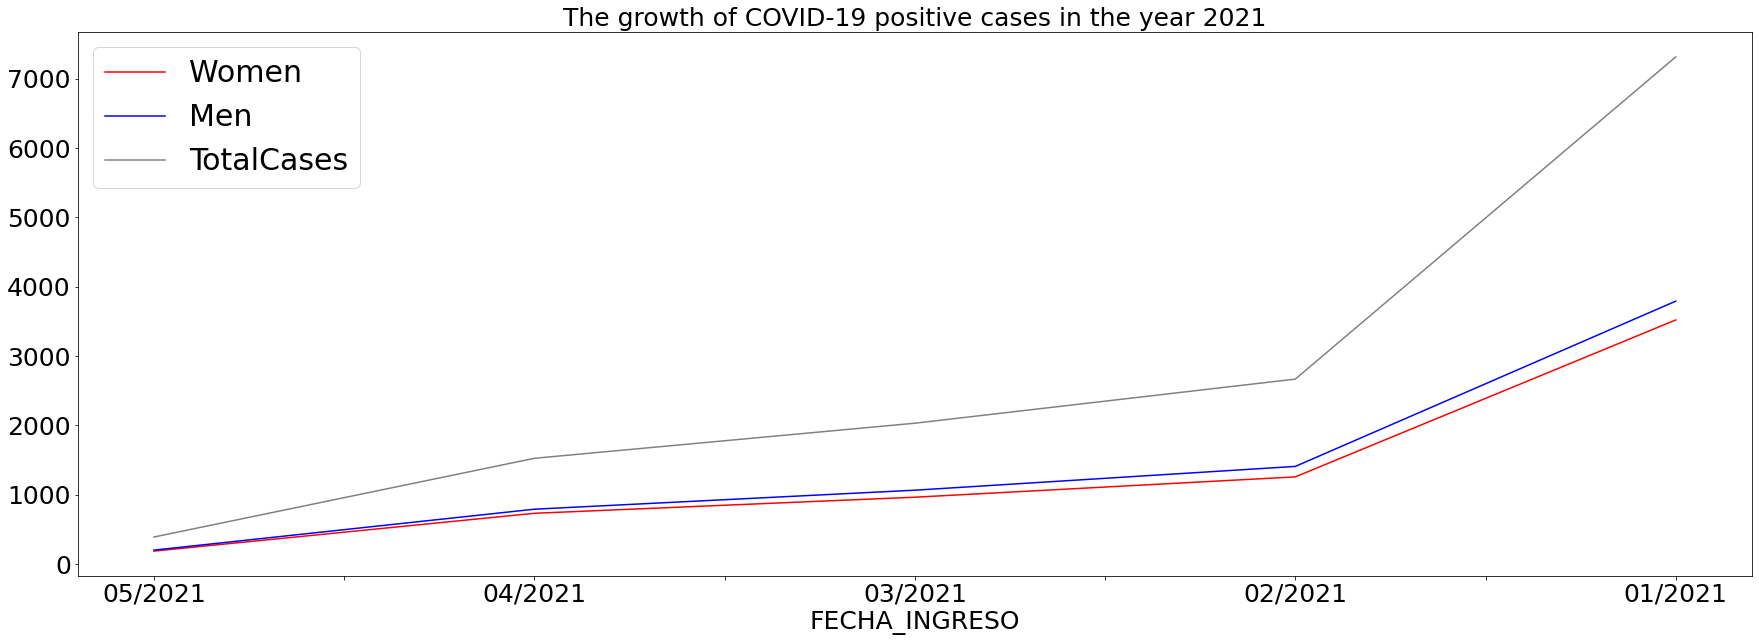

In [25]:
# Creating size of canc
f,ax = plt.subplots(1, figsize=(30,10))

ax = plt.gca()

CasosFecha2021.plot(kind='line',x='FECHA_INGRESO',y='Women', color= 'red',ax=ax)
CasosFecha2021.plot(kind='line',x='FECHA_INGRESO',y='Men', color= 'blue',ax=ax)
CasosFecha2021.plot(kind='line',x='FECHA_INGRESO',y='TotalCases', color='grey', ax=ax)

plt.title("The growth of COVID-19 positive cases in the year 2021",fontsize=25)
ax.legend(fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax. xaxis. label. set_size(25)
ax. yaxis. label. set_size(25)
f.savefig('C:/Users/almej/Desktop/Growth2021.png')

plt.show()

<AxesSubplot:xlabel='TOTAL_CASES', ylabel='Density'>

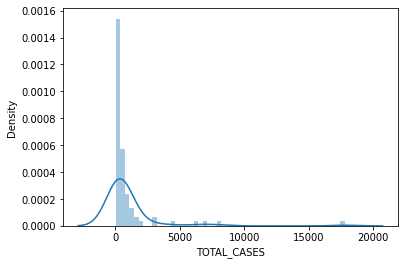

In [27]:
#histogram
sns.distplot(casospositivos['TOTAL_CASES'])

<AxesSubplot:xlabel='TOTAL_POSITIVE', ylabel='Density'>

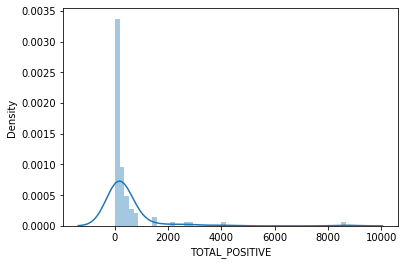

In [28]:
#histogram
sns.distplot(casospositivos['TOTAL_POSITIVE'])

<AxesSubplot:xlabel='TOTAL_UCI', ylabel='Density'>

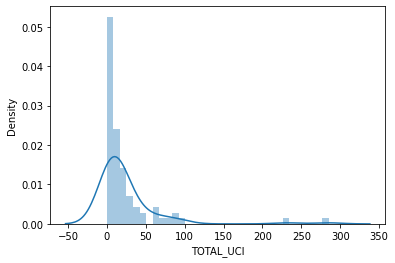

In [29]:
#histogram
sns.distplot(casospositivos['TOTAL_UCI'])

<AxesSubplot:xlabel='TOTAL_DEATHS', ylabel='Density'>

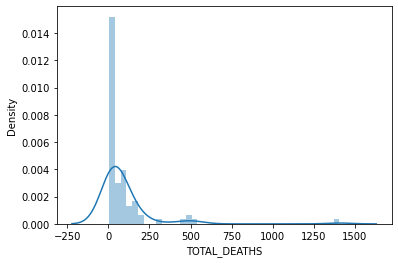

In [30]:
#histogram
sns.distplot(casospositivos['TOTAL_DEATHS'])

In [10]:
heatmap = casospositivos[['TOTAL_MEN', 'MEN_POSITIVE','MEN_UCI', 'MEN_DEATHS','MEN_NEUMONIA','MEN_DIAB', 'MEN_EPOC', 'MEN_ASMA', 'MEN_INMUSUPR',
#             'MEN_HIPERTENSION', 'MEN_OTRA', 'MEN_CARDIOVASCULAR', 'MEN_OBESIDAD', 'MEN_RENAL', 'MEN_TABAQUISMO', 'MEN_OTRO']]

#heatmap = casospositivos[['TOTAL_WOMEN', 'WOMEN_POSITIVE','WOMEN_UCI', 'WOMEN_DEATHS','WOMEN_NEUMONIA','WOMEN_DIAB', 'WOMEN_EPOC', 'WOMEN_ASMA', 'WOMEN_INMUSUPR',
#             'WOMEN_HIPERTENSION', 'WOMEN_OTRA', 'WOMEN_CARDIOVASCULAR', 'WOMEN_OBESIDAD', 'WOMEN_RENAL', 'WOMEN_TABAQUISMO', 'WOMEN_OTRO']]

#heatmap = casospositivos[['TOTAL_CASES', 'TOTAL_POSITIVE','TOTAL_UCI', 'TOTAL_DEATHS','TOTAL_NEUMONIA','TOTAL_DIAB', 'TOTAL_EPOC', 'TOTAL_ASMA', 'TOTAL_INMUSUPR',
             'TOTAL_HIPERTENSION', 'TOTAL_OTRA', 'TOTAL_CARDIOVASCULAR', 'TOTAL_OBESIDAD', 'TOTAL_RENAL', 'TOTAL_TABAQUISMO', 'TOTAL_OTRO']]
heatmap.head(5)

,TOTAL_MEN,MEN_POSITIVE,MEN_UCI,MEN_DEATHS,MEN_NEUMONIA,MEN_DIAB,MEN_EPOC,MEN_ASMA,MEN_INMUSUPR,TOTAL_HIPERTENSION,TOTAL_OTRA,TOTAL_CARDIOVASCULAR,TOTAL_OBESIDAD,TOTAL_RENAL,TOTAL_TABAQUISMO,TOTAL_OTRO
0,201.0,70.0,5.0,20.0,36.0,15.0,1.0,0.0,0.0,43.0,4.0,4.0,26.0,2.0,8.0,68.0
1,240.0,103.0,11.0,42.0,50.0,22.0,0.0,0.0,0.0,44.0,1.0,7.0,48.0,5.0,12.0,51.0
2,642.0,355.0,23.0,131.0,173.0,89.0,4.0,2.0,2.0,148.0,12.0,17.0,136.0,14.0,37.0,308.0
3,90.0,38.0,2.0,9.0,10.0,5.0,2.0,1.0,0.0,18.0,0.0,2.0,14.0,2.0,4.0,26.0
4,249.0,147.0,32.0,46.0,71.0,31.0,3.0,1.0,0.0,54.0,7.0,3.0,49.0,5.0,17.0,159.0


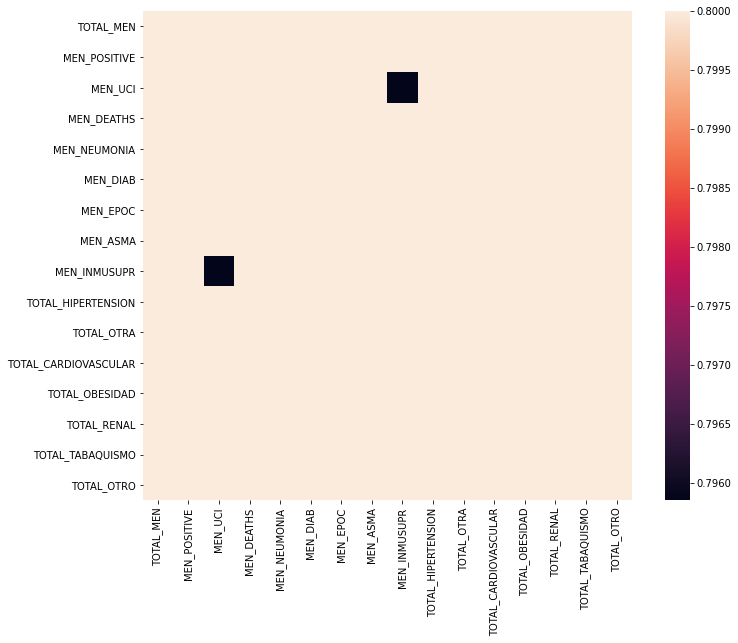

In [11]:
corrmat = heatmap.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
#f.savefig('C:/Users/almej/Desktop/heatmapTOT.png')

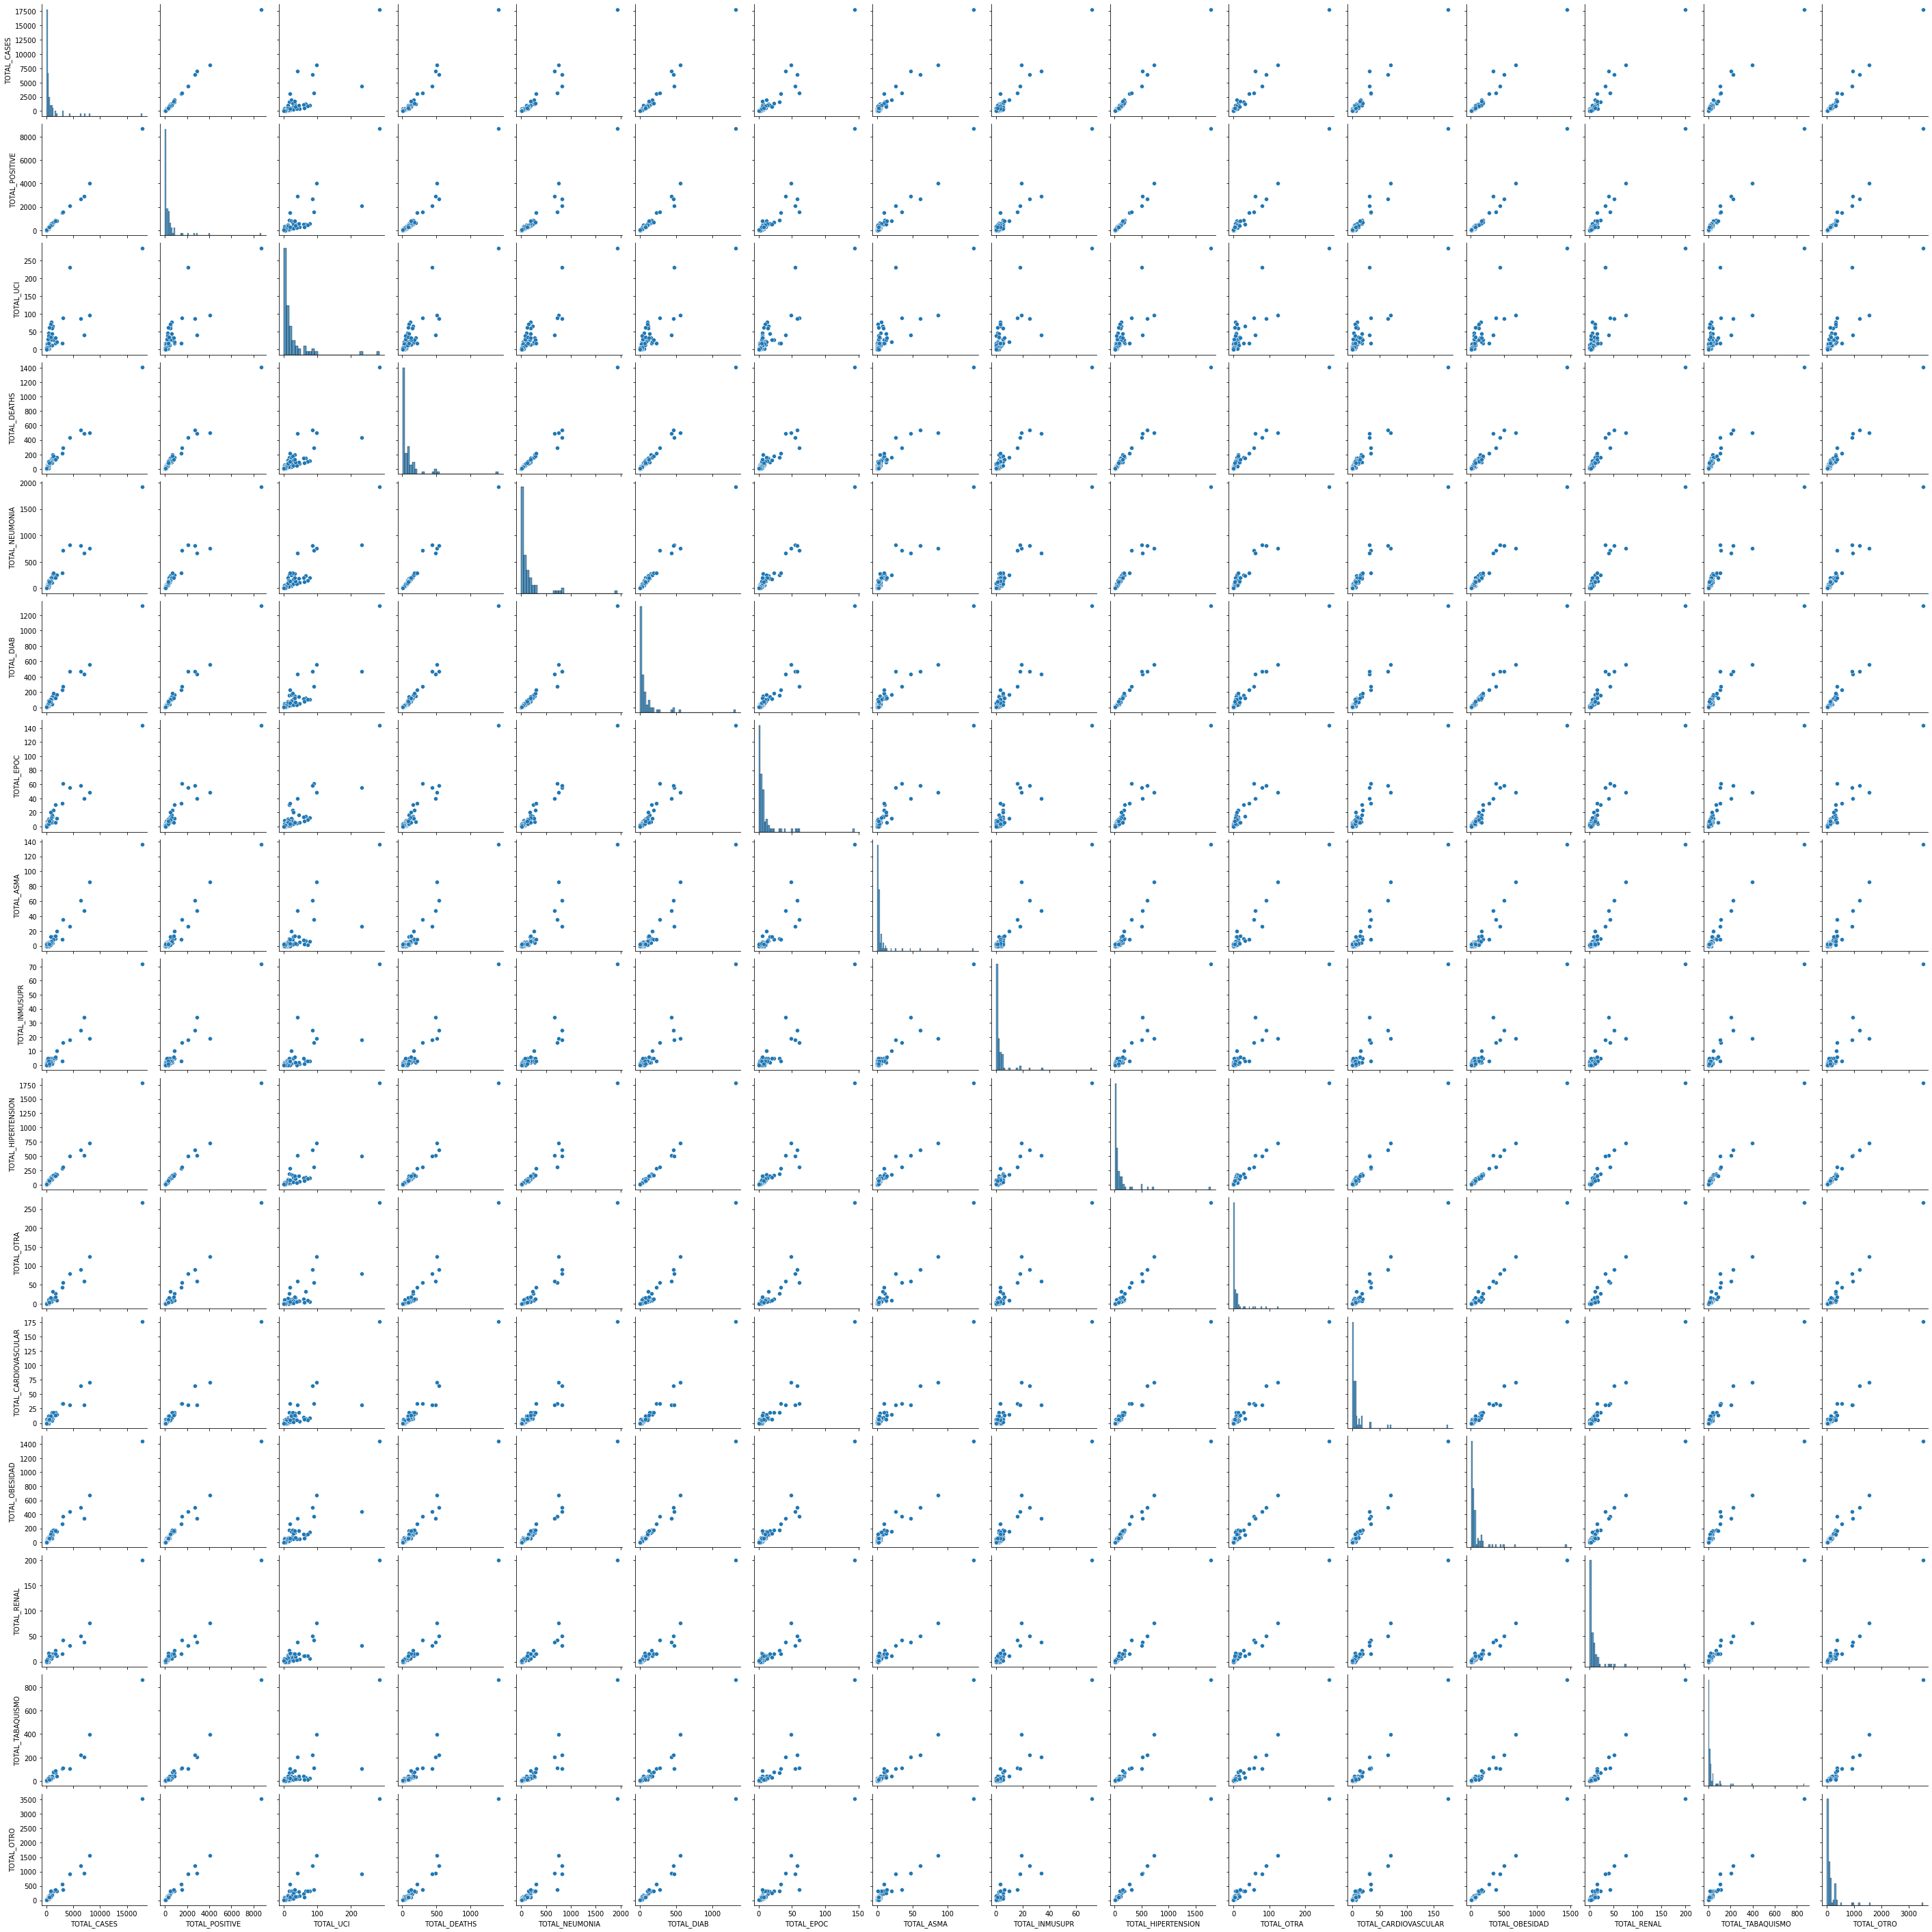

In [42]:
sns.pairplot(data=heatmap)

In [12]:
#variable dependiente duracion
corr = heatmap.corr()
print(corr)

                      TOTAL_MEN  MEN_POSITIVE   MEN_UCI  MEN_DEATHS  \
TOTAL_MEN              1.000000      0.996656  0.865408    0.985000   
MEN_POSITIVE           0.996656      1.000000  0.879862    0.986108   
MEN_UCI                0.865408      0.879862  1.000000    0.899366   
MEN_DEATHS             0.985000      0.986108  0.899366    1.000000   
MEN_NEUMONIA           0.973943      0.975424  0.920698    0.989607   
MEN_DIAB               0.987640      0.990644  0.911054    0.993990   
MEN_EPOC               0.951586      0.954897  0.869994    0.964274   
MEN_ASMA               0.953522      0.954585  0.822273    0.949168   
MEN_INMUSUPR           0.932092      0.911813  0.795850    0.923724   
TOTAL_HIPERTENSION     0.990239      0.996423  0.900944    0.990899   
TOTAL_OTRA             0.977954      0.986453  0.892449    0.974737   
TOTAL_CARDIOVASCULAR   0.968179      0.980322  0.871529    0.974802   
TOTAL_OBESIDAD         0.977975      0.988727  0.910191    0.980861   
TOTAL_

st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=queryframe_constant.columns[:-1]
model=sm.Logit(queryframe.const,queryframe_constant[cols])
result=model.fit()
result.summary()

In [44]:
#Empezamos regresión lineal con machine learning
X = heatmap[['TOTAL_NEUMONIA','TOTAL_DIAB', 'TOTAL_EPOC', 'TOTAL_ASMA', 'TOTAL_INMUSUPR',
             'TOTAL_HIPERTENSION', 'TOTAL_OTRA', 'TOTAL_CARDIOVASCULAR', 'TOTAL_OBESIDAD', 'TOTAL_RENAL', 'TOTAL_TABAQUISMO', 'TOTAL_OTRO']]
y = heatmap['TOTAL_CASES']

In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

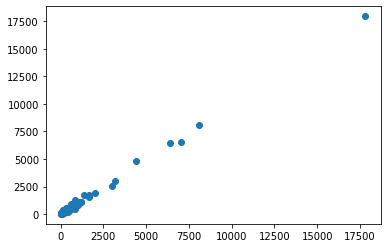

In [46]:
predictions = lm.predict(X)
plt.scatter(y,predictions)

In [47]:
heatmap = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient']) 
heatmap

,Coefficient
TOTAL_NEUMONIA,1.068239
TOTAL_DIAB,1.919834
TOTAL_EPOC,2.020076
TOTAL_ASMA,19.231725
TOTAL_INMUSUPR,28.703135
TOTAL_HIPERTENSION,6.947114
TOTAL_OTRA,2.417323
TOTAL_CARDIOVASCULAR,-7.707260
TOTAL_OBESIDAD,-3.161287
TOTAL_RENAL,-36.415501


In [48]:
#Error
df_predictions = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df_predictions['error'] = df_predictions['Actual'] - df_predictions['Predicted']
df_predictions['error'].mean()

2.842170943040401e-14

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y, predictions)
print(r2)

0.9958988476221413
